In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## KNN of Mean

### Load Data

In [3]:
data = []
labels = []
df = pd.read_csv('data.csv')

base_path = 'data'  
for index, row in df.iterrows():
    video_id = row['video_id']
    label = row['label']
    folder_path = os.path.join(base_path, str(video_id))
    
    if os.path.isdir(folder_path):
        frames = []
        for frame in sorted(os.listdir(folder_path)):
            frame_path = os.path.join(folder_path, frame)
            img = Image.open(frame_path)
            img_array = np.array(img).flatten()
            frames.append(img_array)
            
            avg_frame = np.mean(frames, axis=0)
            data.append(avg_frame)
            labels.append(label)
        

In [4]:
data = np.array(data)
labels = np.array(labels)

### Train, Test, Validation Split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Run KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
print("Validation Accuracy:", knn.score(X_val, y_val) * 100)

Validation Accuracy: 24.493983770170694


In [8]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
print("Validation Accuracy:", knn.score(X_val, y_val) * 100)

Validation Accuracy: 28.15968659639959


In [6]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
print("Validation Accuracy:", knn.score(X_val, y_val) * 100)

Validation Accuracy: 48.44697323010913


In [6]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("Validation Accuracy:", knn.score(X_val, y_val) * 100)

Validation Accuracy: 95.32692845816622


In [7]:
print("Test Accuracy:", knn.score(X_test, y_test) * 100)

Test Accuracy: 95.22477149785487


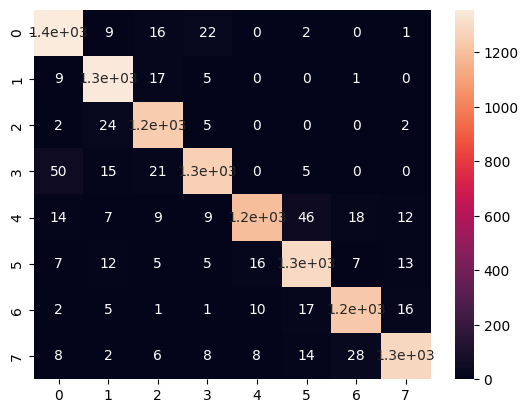

In [9]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Error Rate: {error_rate*100:.2f}")

Error Rate: 4.78


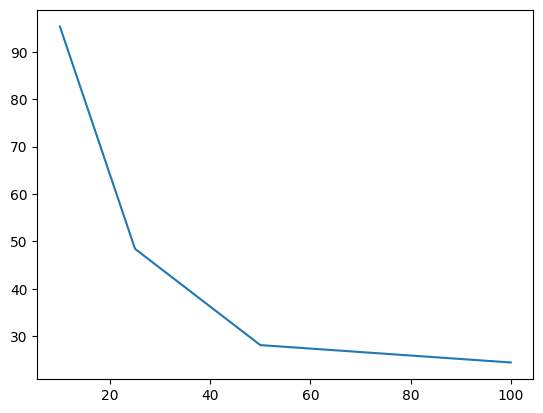

In [14]:
K = [100, 50, 25, 10]
acc = [24.493983770170694, 28.15968659639959, 48.44697323010913, 95.32692845816622]

plt.plot(K, acc)
plt.show()